# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [4]:
df_clear = df.copy()

In [5]:
df_clear= df_clear[df_clear['gender'].notna()]

<AxesSubplot:xlabel='gender', ylabel='Avg_trx'>

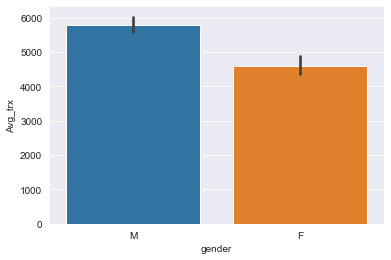

In [6]:
# смотрим средний размер транзакции в разбивке на пол клиента.
sns.barplot(x =df_clear['gender'], y= df_clear['Avg_trx'])

<AxesSubplot:xlabel='Avg_trx', ylabel='city_type'>

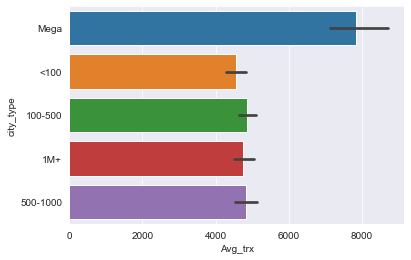

In [7]:
# смотрим средний размер транзакции по типу города
sns.barplot(y =df_clear['city_type'], x= df_clear['Avg_trx'])

<AxesSubplot:xlabel='city_type', ylabel='Avg_trx'>

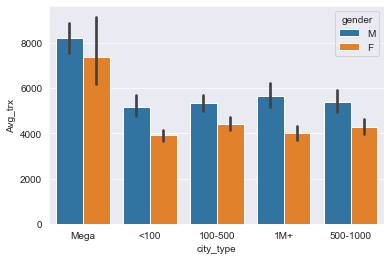

In [8]:
#смотрим транзакции в разбивке на типы города с группировкой по полу
sns.barplot(x="city_type", y="Avg_trx", hue="gender", data=df_clear)

<AxesSubplot:>

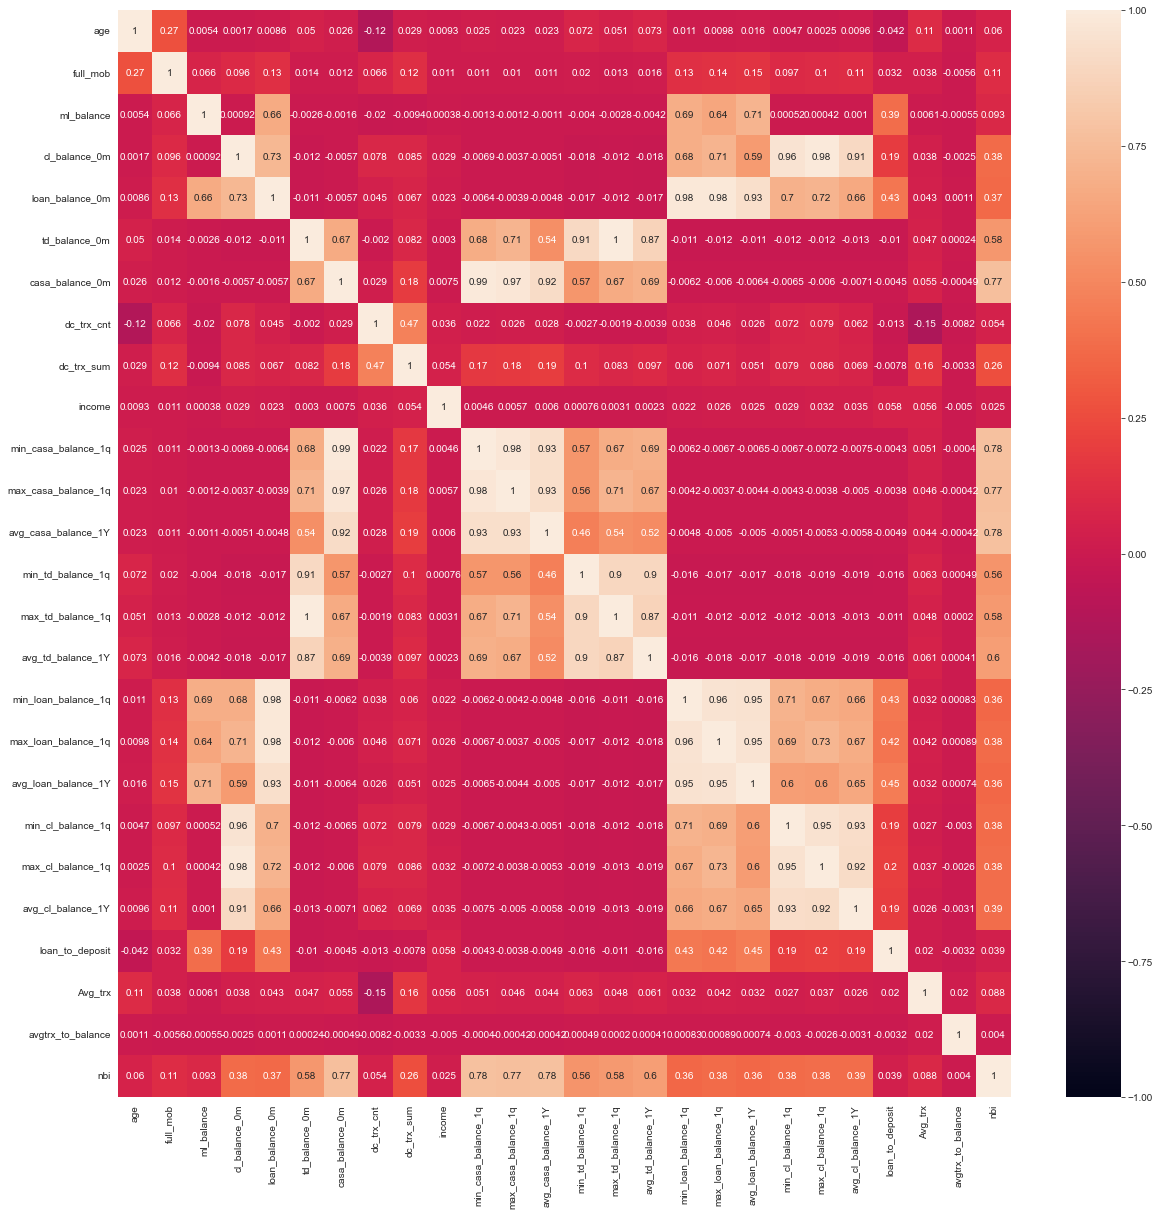

In [9]:
#построение heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_clear.corr(), vmin=-1, vmax=1, annot=True)

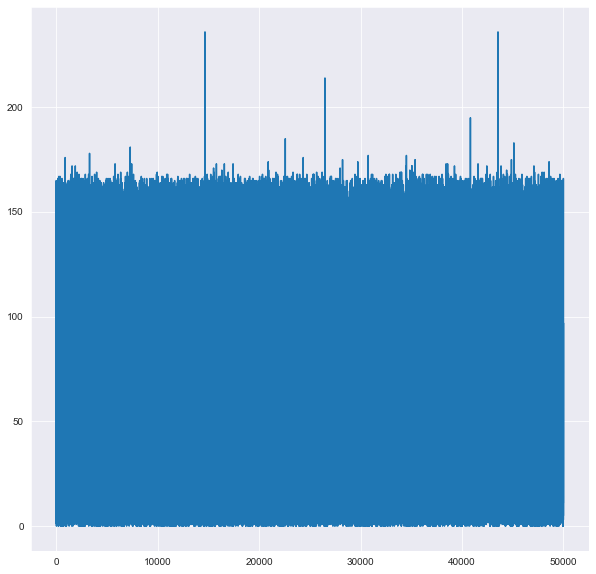

In [10]:
#посмотрим на длительность сотрудничества с клиентами
plt.figure(figsize=(10,10))
plt.plot(df_clear ['full_mob'])

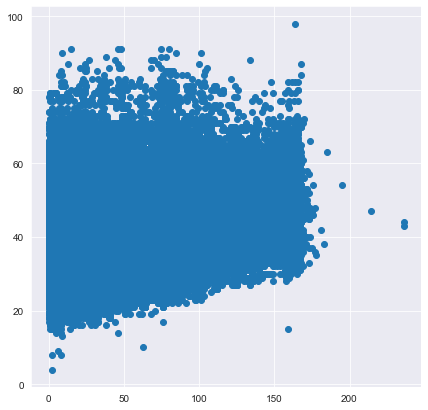

In [11]:
#сделаем скаттерплот по длительность взаимоотношений и возрасту
plt.figure(figsize=(7,7))
plt.scatter(df_clear['full_mob'], df_clear['age'])

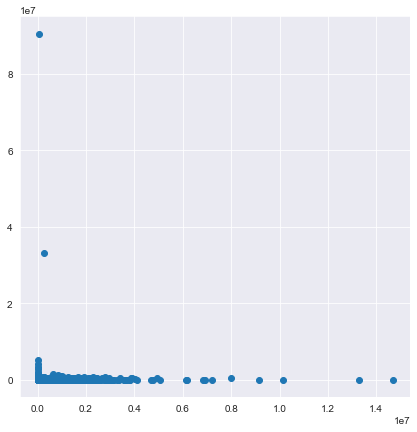

In [12]:
#сделаем скаттерплот по долговой нагрузке и доходу
plt.figure(figsize=(7,7))
plt.scatter(df_clear['loan_balance_0m'], df_clear['income'])

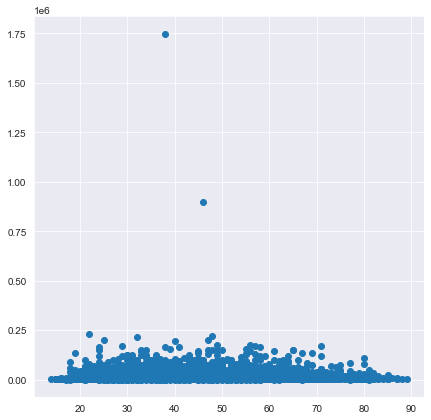

In [19]:
# смотрим средний размер транзакции по возрасту
plt.figure(figsize=(7,7))
plt.scatter(df_clear['age'], df_clear['Avg_trx'])

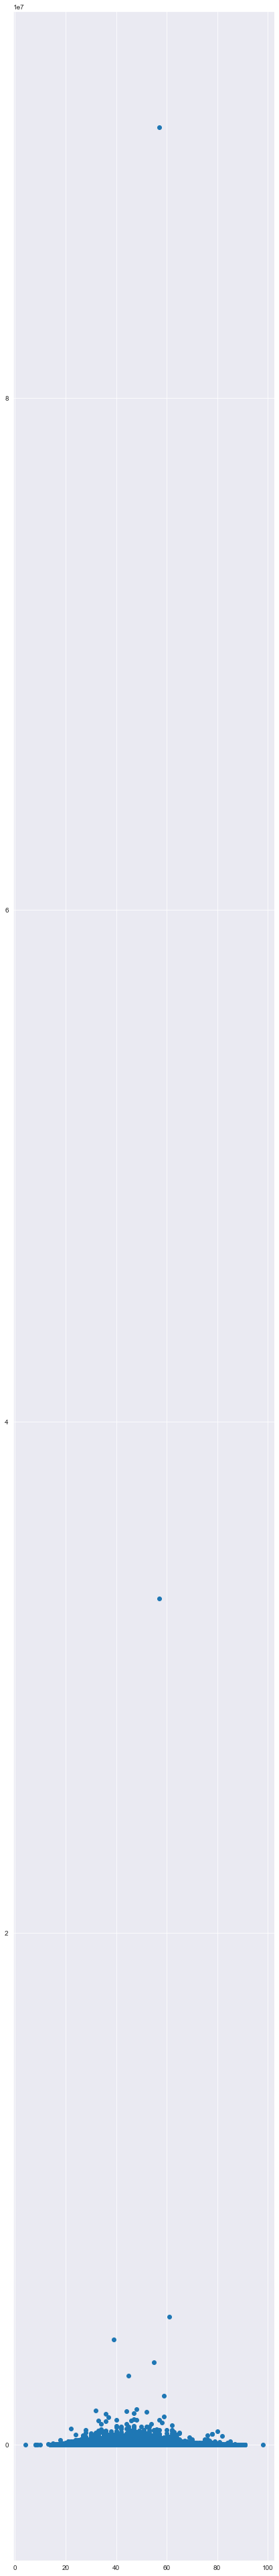

In [20]:
# смотрим размер дохода по возрасту
plt.figure(figsize=(7,70))
plt.scatter(df_clear['age'], df_clear['income'])

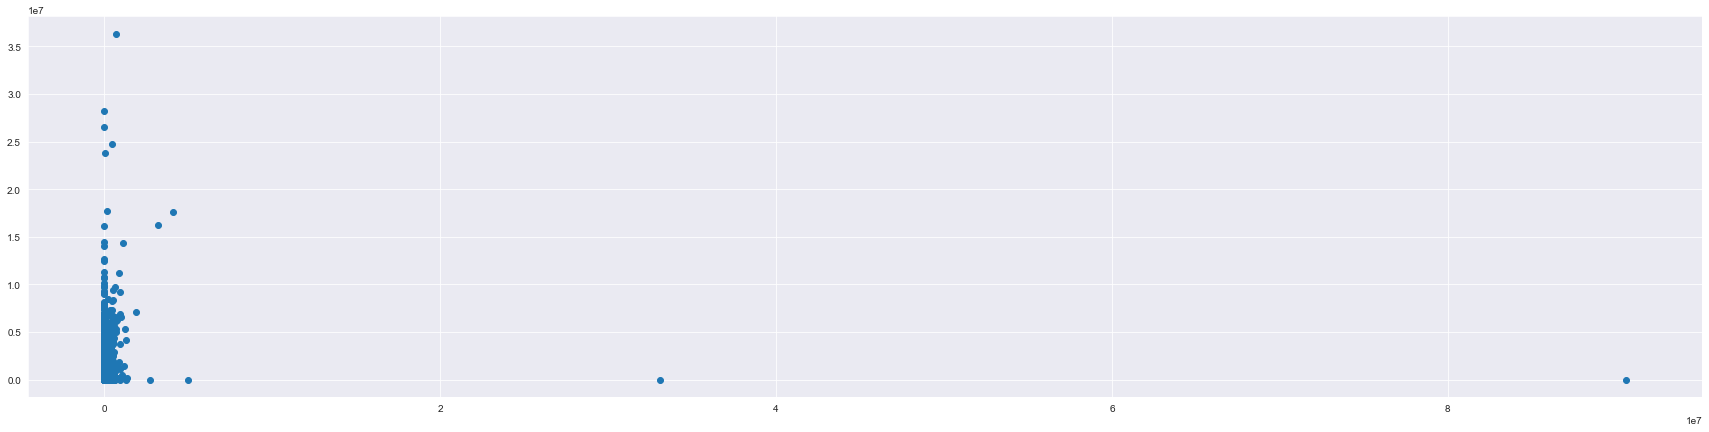

In [24]:
# смотрим размер дохода по возрасту
plt.figure(figsize=(30,7))
plt.scatter(df_clear['income'], df_clear['dc_trx_sum'])